# DIGS 20006/30006 : NLP Project

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
#coding=utf-8
import jieba
import nltk
import zh_core_web_sm
import os
import sys
import json

In [3]:
#imports and set up logging
import gensim 
import logging
import glob
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [237]:
#directory containing all source texts for training the model 
my_dir = "/Users/tianchushu/Desktop/NLP/ci/"
os.chdir(my_dir)

# here I define my pandas Dataframe with the columns I want to get from the json
jsons_data = pd.DataFrame(columns=['author','rhythmic', 'paragraphs' ])
doc = []
index = 0
for filename in glob.glob("*.json"):
    with open(filename) as json_file:
        filedata = json.load(json_file)
        print(filename + " has " + str(len(filedata)) + " poems") 
        for poem in filedata:
            author = poem['author']
            paragraphs = " ".join(poem['paragraphs'])
            rhythmic = poem['rhythmic']
            #here I push a list of data into a pandas DataFrame at row give
            jsons_data.loc[index] = [author, rhythmic, paragraphs]
            index += 1

ci.song.15000.json has 1000 poems
ci.song.9000.json has 1000 poems
ci.song.1000.json has 1000 poems
ci.song.14000.json has 1000 poems
ci.song.8000.json has 1000 poems
ci.song.3000.json has 1000 poems
ci.song.20000.json has 1000 poems
ci.song.16000.json has 1000 poems
ci.song.17000.json has 1000 poems
ci.song.2000.json has 1000 poems
ci.song.21000.json has 50 poems
ci.song.7000.json has 1000 poems
ci.song.12000.json has 1000 poems
ci.song.0.json has 1000 poems
ci.song.13000.json has 997 poems
ci.song.6000.json has 1000 poems
ci.song.11000.json has 1000 poems
ci.song.4000.json has 1000 poems
ci.song.18000.json has 1000 poems
ci.song.5000.json has 1000 poems
ci.song.19000.json has 1000 poems
ci.song.10000.json has 1000 poems


In [244]:
jsons_data.shape

(21047, 3)

In [250]:
df['author'].nunique()

1468

In [249]:
df['rhythmic'].nunique()

1420

In [247]:
df = jsons_data.drop_duplicates()

In [248]:
df.shape

(20789, 3)

In [251]:
#filtrate.sub(r'', content) # remove all non-Chinese characters
def chinese_word_cut(mytext):
    mytext = re.sub(r'[^\w\s\d]',' ', mytext) 
    sent = " ".join(jieba.cut(mytext))
    sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
    return sent

In [252]:
df["content_cutted"] = df.paragraphs.apply(chinese_word_cut)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [253]:
df.head()

,author,rhythmic,paragraphs,content_cutted
0,张榘,瑞鹤仙,碧油推上客。 有神机沈密，参运帷幄。 威声际沙漠。 庆云飞川泳，和熏三白。 霄渊鬲。 甚探梅、也来相约。 更谁怜久客，泥深穿履，栖栖东郭。 农麦。 年来管好，禾黍离离，讵忘关洛。 风高水涸。 ...,"[碧油, 推上, 神机, 沈密, 参运, 帷幄, 威声, 沙漠, 庆云, 飞川泳, 熏三白, 霄渊, 探梅, 相约, 怜久客, 泥深, 栖栖, 东郭, 农麦, 管好, 离离, 关洛, 风高水涸..."
1,张榘,沁园春,绿野归来，筇杖角巾，岂不快哉。 有清泉白石，东西岩岫，翠阴红影，高下楼台。 况是蕤宾，槐庭暑薄，照眼葵榴次第开。 轻熏里，翦香蒲为寿，一笑传杯。 栽培。 多少英材。 更霖雨、看看遍九垓。 算支...,"[绿野, 归来, 角巾, 不快, 清泉, 白石, 东西, 翠阴, 红影, 高下, 楼台, 况是, 蕤宾, 槐庭暑, 照眼, 葵榴, 次第, 轻熏里, 香蒲, 为寿, 一笑, 传杯, 栽培, 多..."
2,张榘,木兰花慢,豆花轻雨霁，更七日、是中秋。 记分野三台，家山双阙，孕秀名流。 平生佐时大略，有忠勤、一念等伊周。 十载清风楚泽，三年明月扬州。 须知万灶出貔貅。 智勇迈前猷。 自向来颖，□番平海，胆落毡裘。,"[豆花, 轻雨, 七日, 中秋, 分野, 三台, 家山, 孕秀, 名流, 平生, 佐时, 大略, 有忠勤, 一念, 伊周, 十载, 清风, 楚泽, 三年, 明月, 扬州, 须知, 万灶, 貔貅..."
3,张榘,好事近,素壁走龙蛇，难觅醉翁真迹。 惟有断岗衰草，是几番经历。 紫萸黄菊又西风，同作携壶客。 清兴未阑归去，负晴空明月。,"[素壁, 龙蛇, 难觅, 醉翁, 真迹, 惟有, 断岗, 衰草, 几番, 经历, 紫萸, 黄菊, 西风, 同作, 携壶, 清兴, 归去, 晴空, 明月]"
4,张榘,摸鱼儿,望神京、目断烟草，青天长剑频倚。 香街十里朱帘月，空想当年华丽。 堪叹处。 渺沙霭蒹葭，咿ン雁声起。 平山谩记。 怅杨柳春风，晴空栏槛，陈迹总非是。 重阳好，红叶黄华满地。 良辰美景如此。 青...,"[神京, 目断, 烟草, 青天, 长剑, 频倚, 香街, 十里, 朱帘, 空想, 当年, 华丽, 堪叹, 渺沙霭, 雁声, 平山, 谩记, 杨柳, 春风, 晴空, 栏槛, 陈迹, 总非, 重阳..."


In [254]:
df['author'].unique()

array(['张榘', '刘克逊', '王广文', ..., '赵长卿', '罗愿', '楼钥'], dtype=object)

In [255]:
data = df.content_cutted.values.tolist()

In [256]:
data_words = list(data)
print(data_words[:1])

[['碧油', '推上', '神机', '沈密', '参运', '帷幄', '威声', '沙漠', '庆云', '飞川泳', '熏三白', '霄渊', '探梅', '相约', '怜久客', '泥深', '栖栖', '东郭', '农麦', '管好', '离离', '关洛', '风高水涸', '多少', '韬略', '鹅池', '夜渡', '黎明', '飞捷', '儿辈', '未觉', '冲寒', '铁骑', '横驱', '汛扫', '六合']]


In [257]:
stop_words = ['的', '了', '和', '是', '就', '都', '而', '及', '與', '著', '或','且', '一個', '沒有', '是否']

# 2.  Create bigram and trigrams

In [258]:
%%time

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])
print('\n')

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

['碧油', '推上', '神机', '沈密', '参运', '帷幄', '威声', '沙漠', '庆云', '飞川泳', '熏三白', '霄渊', '探梅', '相约', '怜久客', '泥深', '栖栖', '东郭', '农麦', '管好', '离离', '关洛', '风高水涸', '多少', '韬略', '鹅池', '夜渡', '黎明', '飞捷', '儿辈', '未觉', '冲寒', '铁骑', '横驱', '汛扫', '六合']


CPU times: user 14.4 s, sys: 144 ms, total: 14.5 s
Wall time: 14.8 s


In [259]:
%%time
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

CPU times: user 1.42 s, sys: 33.6 ms, total: 1.45 s
Wall time: 1.46 s


In [260]:
%%time
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
#corpus.filter_n_most_frequent(2)

# View
print(corpus[2])

[(79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1)]
CPU times: user 1.21 s, sys: 32.2 ms, total: 1.25 s
Wall time: 1.26 s


In [261]:
len(id2word)

142555

In [262]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('东郭', 1),
  ('儿辈', 1),
  ('六合', 1),
  ('关洛', 1),
  ('农麦', 1),
  ('冲寒', 1),
  ('参运', 1),
  ('多少', 1),
  ('夜渡', 1),
  ('威声', 1),
  ('帷幄', 1),
  ('庆云', 1),
  ('怜久客', 1),
  ('探梅', 1),
  ('推上', 1),
  ('未觉', 1),
  ('栖栖', 1),
  ('横驱', 1),
  ('汛扫', 1),
  ('沈密', 1),
  ('沙漠', 1),
  ('泥深', 1),
  ('熏三白', 1),
  ('相约', 1),
  ('碧油', 1),
  ('神机', 1),
  ('离离', 1),
  ('管好', 1),
  ('铁骑', 1),
  ('霄渊', 1),
  ('韬略', 1),
  ('风高水涸', 1),
  ('飞川泳', 1),
  ('飞捷', 1),
  ('鹅池', 1),
  ('黎明', 1)],
 [('多少', 1),
  ('一笑', 1),
  ('一起', 1),
  ('不快', 1),
  ('东西', 1),
  ('为寿', 1),
  ('传杯', 1),
  ('元台', 1),
  ('兴思', 1),
  ('况是', 1),
  ('厦屋', 1),
  ('天边', 1),
  ('应有', 1),
  ('归来', 1),
  ('支撑', 1),
  ('栽培', 1),
  ('梁栋', 1),
  ('楼台', 1),
  ('槐庭暑', 1),
  ('次第', 1),
  ('正资', 1),
  ('清泉', 1),
  ('照眼', 1),
  ('白石', 1),
  ('盐梅', 1),
  ('看看', 1),
  ('红影', 1),
  ('绅望', 1),
  ('绿野', 1),
  ('翠阴', 1),
  ('苍生', 1),
  ('英材', 1),
  ('葵榴', 1),
  ('蕤宾', 1),
  ('角巾', 1),
  ('调和', 1),
  ('轻熏里', 1),
  ('还是', 1),
  ('遍九垓', 1),
  ('重位', 1),
  (

In [263]:
%%time

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           iterations=100,
                                           per_word_topics=True)


pprint(lda_model.print_topics())

[(0,
  '0.030*"人间" + 0.009*"尊前" + 0.009*"今年" + 0.008*"今日" + 0.008*"无奈" + 0.008*"今夜" '
  '+ 0.008*"今宵" + 0.008*"胭脂" + 0.007*"风光" + 0.007*"蓬莱"'),
 (1,
  '0.021*"天气" + 0.018*"佳人" + 0.015*"憔悴" + 0.012*"清明" + 0.011*"一夜" + 0.010*"明日" '
  '+ 0.010*"人生" + 0.008*"应是" + 0.008*"几回" + 0.007*"无力"'),
 (2,
  '0.012*"青山" + 0.010*"不管" + 0.010*"真个" + 0.009*"有时" + 0.008*"知道" + 0.006*"不觉" '
  '+ 0.006*"游人" + 0.005*"处处" + 0.005*"小雨" + 0.005*"临风"'),
 (3,
  '0.018*"凄凉" + 0.014*"当时" + 0.013*"依旧" + 0.009*"梨花" + 0.008*"不胜" + 0.008*"今朝" '
  '+ 0.007*"光阴" + 0.007*"寿阳" + 0.007*"无穷" + 0.007*"特地"'),
 (4,
  '0.011*"东风" + 0.005*"归来" + 0.004*"多少" + 0.004*"如今" + 0.004*"芳草" + 0.004*"多情" '
  '+ 0.004*"当年" + 0.004*"天涯" + 0.004*"无人" + 0.003*"扁舟"'),
 (5,
  '0.016*"东君" + 0.014*"相思" + 0.008*"何事" + 0.008*"十分" + 0.008*"西湖" + 0.008*"无情" '
  '+ 0.007*"只恐" + 0.007*"天上" + 0.007*"江山" + 0.007*"惟有"'),
 (6,
  '0.012*"故人" + 0.012*"斜阳" + 0.011*"精神" + 0.010*"风月" + 0.010*"断肠" + 0.008*"不是" '
  '+ 0.008*"一声" + 0.008*"思量" + 0.008*"等闲" + 0.007*

In [264]:
%%time

# Compute Perplexity a measure of how good the model is
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\n')


Perplexity:  -14.57176687115755

Coherence Score:  0.2943803531778366


CPU times: user 5.65 s, sys: 223 ms, total: 5.87 s
Wall time: 6.5 s


In [115]:
import jieba
import jieba.analyse

def process_words(texts, stop_words=stop_words, allowed_postags=('n','nr','ns')):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = zh_core_web_sm.load()
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    #remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [265]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_words):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    #Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words_bigrams)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Raw text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Raw text
0,0,4.0,0.3388,"东风, 归来, 多少, 如今, 芳草, 多情, 当年, 天涯, 无人, 扁舟","[碧油, 推上, 神机, 沈密, 参运, 帷幄, 威声, 沙漠, 庆云, 飞川泳, 熏三白, 霄渊, 探梅, 相约, 怜久客, 泥深, 栖栖, 东郭, 农麦, 管好, 离离, 关洛, 风高水涸..."
1,1,4.0,0.4943,"东风, 归来, 多少, 如今, 芳草, 多情, 当年, 天涯, 无人, 扁舟","[绿野, 归来, 角巾, 不快, 清泉, 白石, 东西, 翠阴, 红影, 高下, 楼台, 况是, 蕤宾, 槐庭暑, 照眼, 葵榴, 次第, 轻熏里, 香蒲, 为寿, 一笑, 传杯, 栽培, 多..."
2,2,8.0,0.3566,"风流, 梅花, 江南, 黄昏, 归去, 千里, 明月, 西风, 阑干, 万里","[豆花, 轻雨, 七日, 中秋, 分野, 三台, 家山, 孕秀, 名流, 平生, 佐时, 大略, 有忠勤, 一念, 伊周, 十载, 清风, 楚泽, 三年, 明月, 扬州, 须知, 万灶, 貔貅..."
3,3,4.0,0.2888,"东风, 归来, 多少, 如今, 芳草, 多情, 当年, 天涯, 无人, 扁舟","[素壁, 龙蛇, 难觅, 醉翁, 真迹, 惟有, 断岗, 衰草, 几番, 经历, 紫萸, 黄菊, 西风, 同作, 携壶, 清兴, 归去, 晴空, 明月]"
4,4,8.0,0.3771,"风流, 梅花, 江南, 黄昏, 归去, 千里, 明月, 西风, 阑干, 万里","[神京, 目断, 烟草, 青天, 长剑, 频倚, 香街, 十里, 朱帘, 空想, 当年, 华丽, 堪叹, 渺沙霭, 雁声, 平山, 谩记, 杨柳, 春风, 晴空, 栏槛, 陈迹, 总非, 重阳..."
5,5,4.0,0.2996,"东风, 归来, 多少, 如今, 芳草, 多情, 当年, 天涯, 无人, 扁舟","[斜日, 淡芜, 重阳, 一年, 垂杨, 几度, 飞绵, 晴空, 山色, 多少, 沙霭, 暗中, 横戈, 夜眠, 今宵, 花边, 准拟, 秋天, 气好, 重把, 嗅芳妍]"
6,6,4.0,0.3034,"东风, 归来, 多少, 如今, 芳草, 多情, 当年, 天涯, 无人, 扁舟","[香凝雾, 重阳, 三日, 朱户, 紫殿, 玉垣, 称寿, 潋滟, 琼花, 清露, 万里, 尘清, 淮浦, 地宝, 从来, 标瑞应, 甚新, 秀出, 金芝树, 此处, 诞申甫, 人间, 小住,..."
7,7,8.0,0.4017,"风流, 梅花, 江南, 黄昏, 归去, 千里, 明月, 西风, 阑干, 万里","[匹马, 山路, 怅年, 只解, 邮亭, 送人, 归去, 季子, 貂裘, 尘渐, 犹是, 区区, 羁旅, 谩空, 剑锋, 如故, 消仪, 莫洒, 英雄, 鞭未动, 频举, 西风, 乱叶, 长安..."
8,8,4.0,0.3397,"东风, 归来, 多少, 如今, 芳草, 多情, 当年, 天涯, 无人, 扁舟","[淮海, 波澄, 湛桂影, 半规, 凉月, 还是, 中秋, 相近, 垂弧, 时节, 飞来, 眷重, 彩衣, 著处, 慈颜, 注紫清, 花露, 入瑶, 琼香滑, 羽扇, 持旄钺, 海浪, 阴山,..."
9,9,8.0,0.3265,"风流, 梅花, 江南, 黄昏, 归去, 千里, 明月, 西风, 阑干, 万里","[春梦, 茸茸, 愁雨愁, 对花须, 频中, 莫遣, 枝头, 银烛, 辜负, 嫣红, 推起, 书丛, 何苦, 匆匆, 悭吟, 却讶, 少陵, 定为, 花开, 一笑, 日上, 篱东]"


In [266]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", 'Raw text']


# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Raw text
0,4.0,0.5275,"东风, 归来, 多少, 如今, 芳草, 多情, 当年, 天涯, 无人, 扁舟","[鹊桥, 迢迢, 重湖, 风浪, 去年, 时候, 岁月, 不留, 人易, 万事, 茫茫, 宇宙, 独对, 西风, 搔首, 巧拙, 岂关, 今夕, 奈痴儿, 流传, 话柄, 柳州, 道人, 识破..."
1,8.0,0.4017,"风流, 梅花, 江南, 黄昏, 归去, 千里, 明月, 西风, 阑干, 万里","[匹马, 山路, 怅年, 只解, 邮亭, 送人, 归去, 季子, 貂裘, 尘渐, 犹是, 区区, 羁旅, 谩空, 剑锋, 如故, 消仪, 莫洒, 英雄, 鞭未动, 频举, 西风, 乱叶, 长安..."


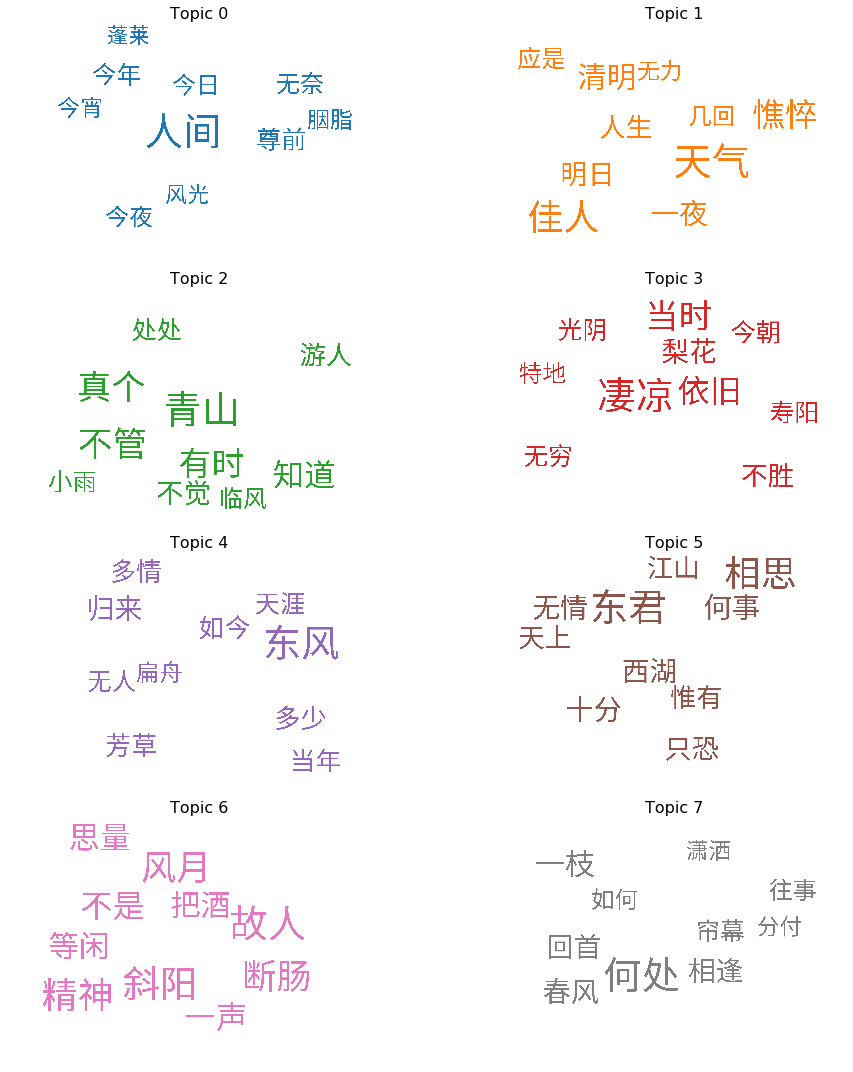

In [267]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  
#more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=stop_words,
                  font_path='/Users/tianchushu/Downloads/NotoSansCJKsc-Regular.otf',
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [268]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, random_state):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=random_state, # = set.seed
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)
#         model = gensim.models.wrappers.LdaMallet(mallet_path,
#                                               corpus=corpus,
#                                               num_topics=num_topics,
#                                               id2word=id2word,
#                                               per_word_topics=False)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        co_value = coherencemodel.get_coherence()
        coherence_values.append(co_value)
        print(num_topics, co_value)

    return model_list, coherence_values

In [269]:
%%time
# Can take a long time to run.
start = 10
limit = 45
step = 5
random_state = 30
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words,
                                                        start=start, limit=limit, step=step, random_state=random_state)

10 0.32369846576338185
15 0.34516396199832255
20 0.3379560404783345
25 0.34268983365890904
30 0.35333630507547986
35 0.35253655153940405
40 0.3621805606434353
CPU times: user 1h 16min 28s, sys: 2min 18s, total: 1h 18min 47s
Wall time: 1h 59min 38s


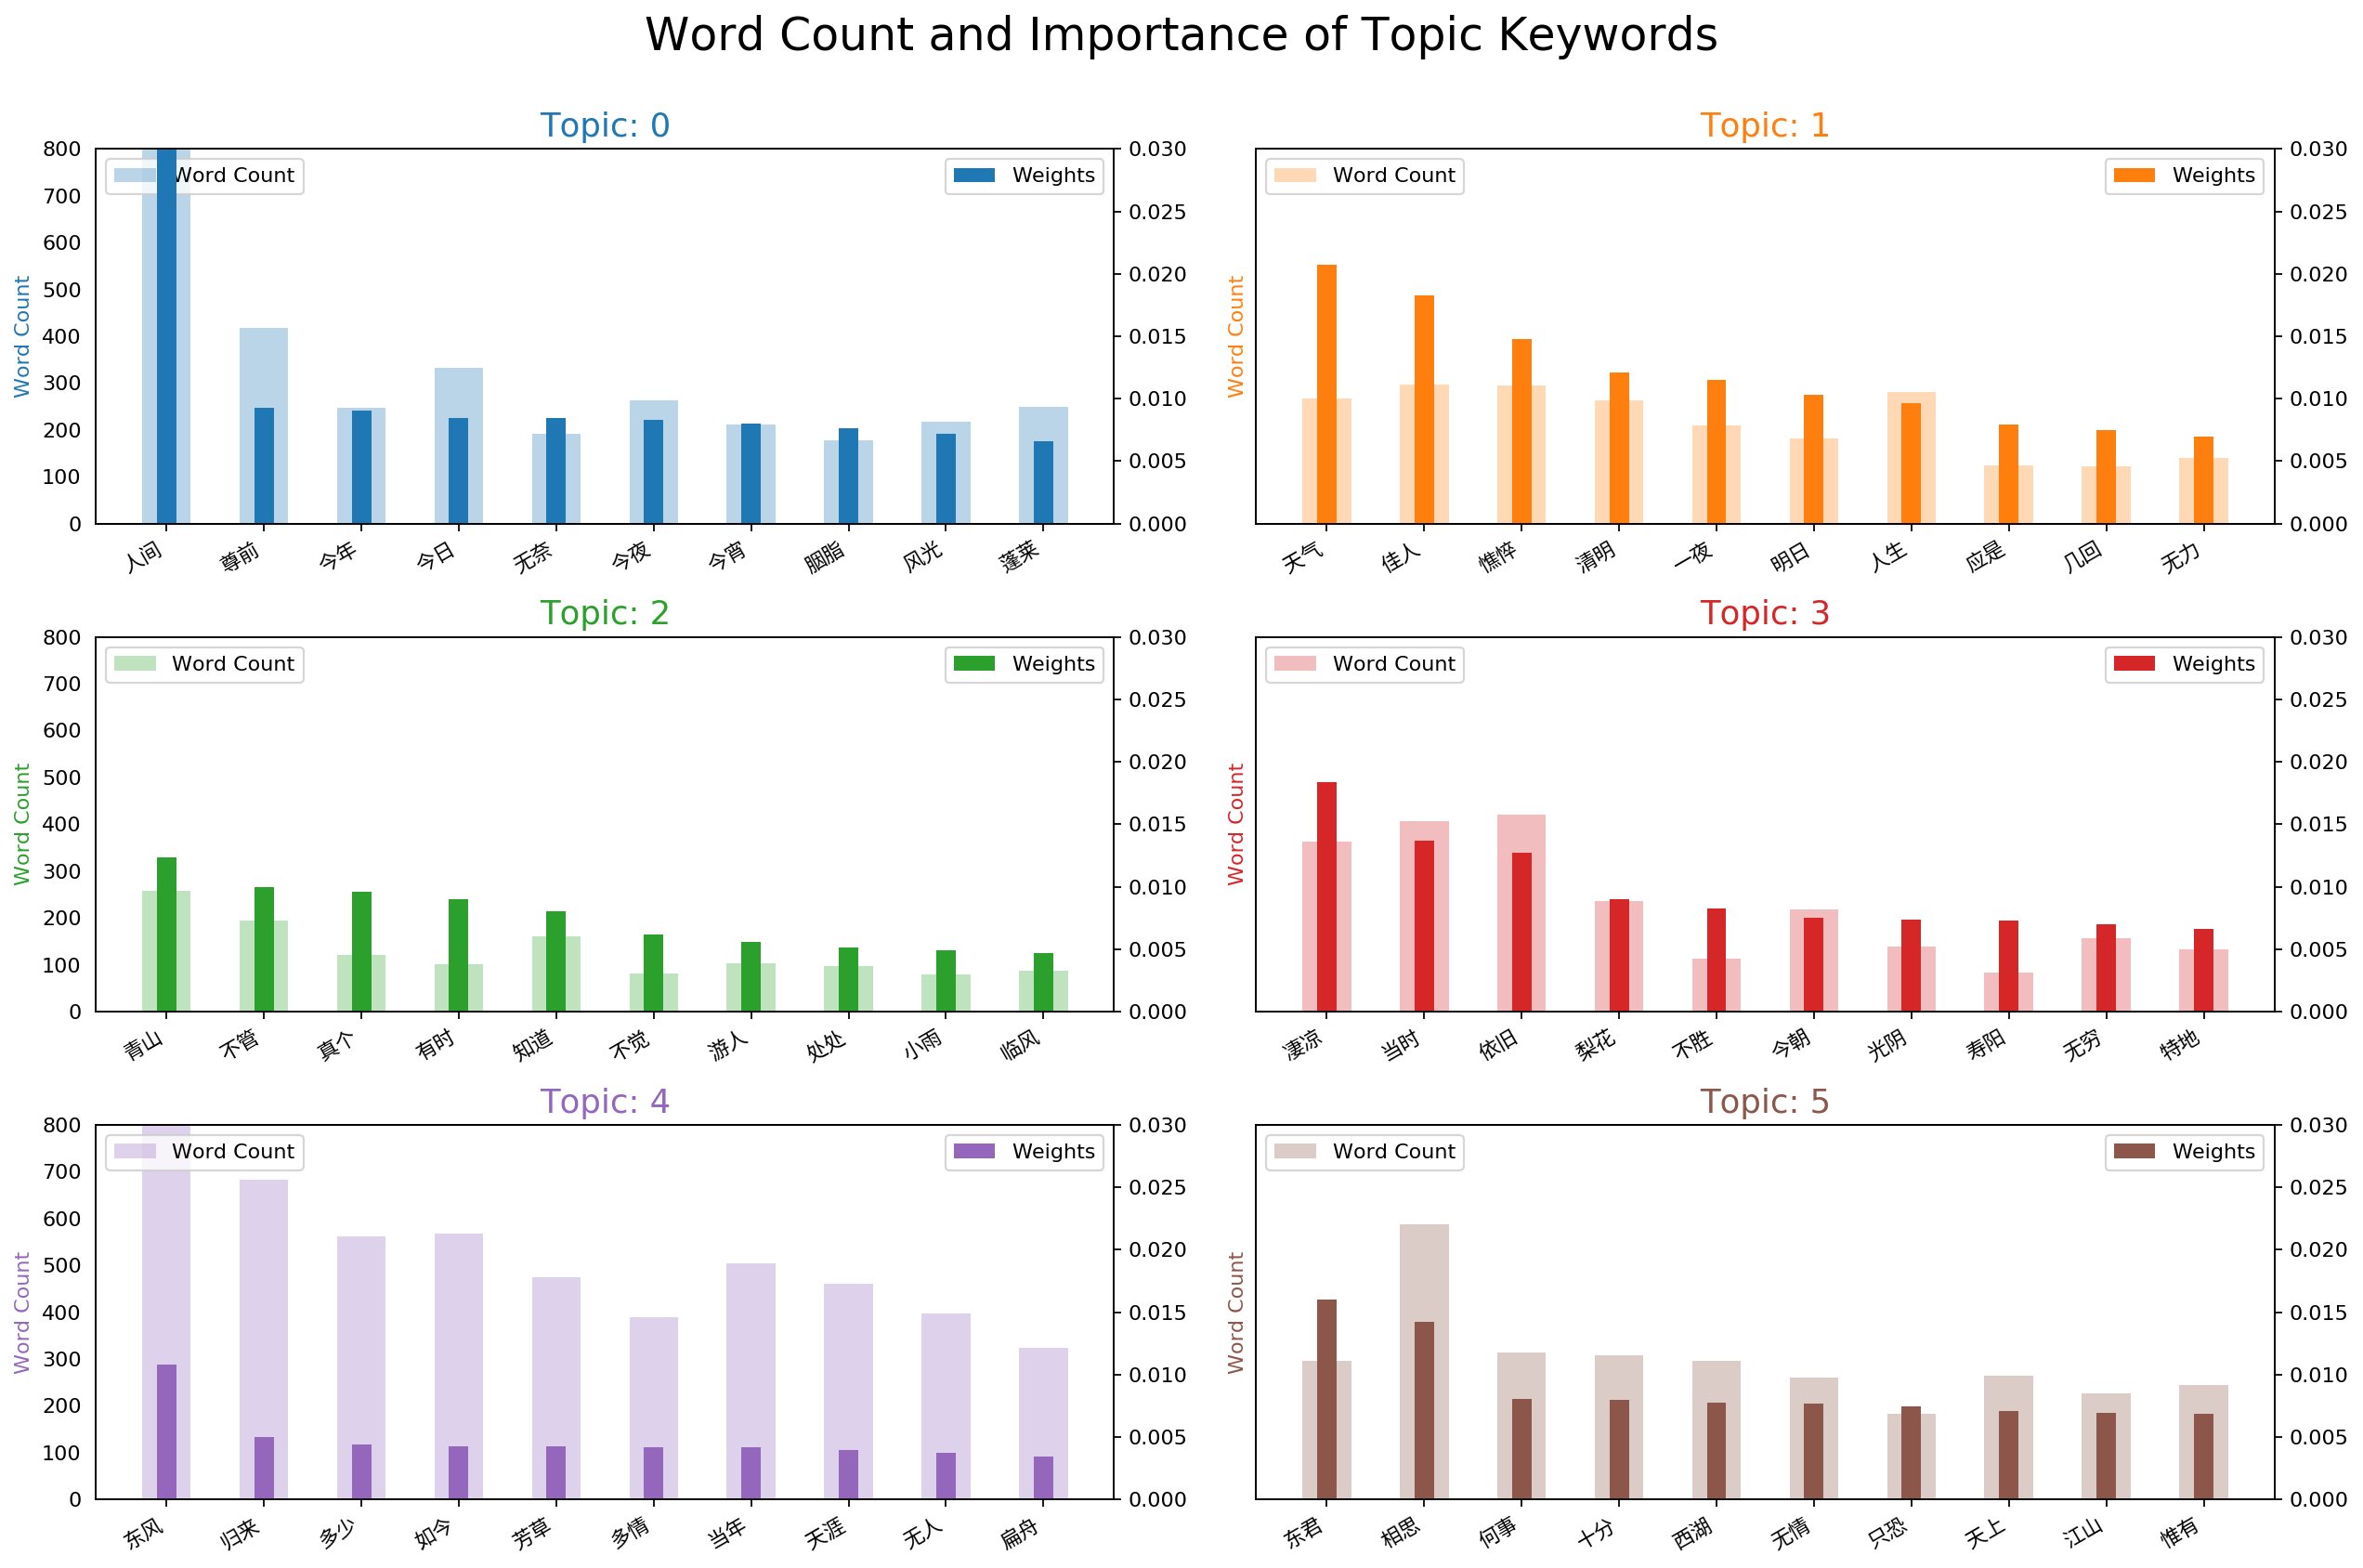

In [270]:
# -*- coding: utf-8 -*-
from collections import Counter
from matplotlib.font_manager import FontProperties
ChineseFont1 = FontProperties(fname='/Users/tianchushu/Downloads/NotoSansCJKsc-Regular.otf')


topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 800)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontproperties = ChineseFont1)
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
 # Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
# -*- coding: utf-8 -*-
def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 2):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700, fontproperties = ChineseFont1)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()
    

sentences_chart()   

In [274]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)


In [275]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.4]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 280 samples in 0.004s...
[t-SNE] Computed neighbors for 280 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 280 / 280
[t-SNE] Mean sigma: 0.011768
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.697712
[t-SNE] KL divergence after 1000 iterations: 0.716847


Loading BokehJS ...

In [276]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.380430 -0.110676       1        1  34.447433
8      0.075369  0.365445       2        1  25.514528
7     -0.048552 -0.032293       3        1  11.366447
5     -0.060265 -0.034587       4        1   6.799544
6     -0.060062 -0.034576       5        1   6.684767
0     -0.060534 -0.034437       6        1   6.527849
3     -0.060399 -0.032830       7        1   4.376957
1     -0.056918 -0.029777       8        1   1.969850
9     -0.055500 -0.028771       9        1   1.429346
2     -0.053569 -0.027500      10        1   0.883274, topic_info=     Category         Freq Term        Total  loglift  logprob
term                                                          
732   Default  1220.000000   何处  1220.000000  30.0000  30.0000
188   Default   945.000000   人间   945.000000  29.0000  29.0000
537   Default  1796.000000   东风  1796.000000  28.0000  28.0000
850   Default  1250.000000   风流  1250.000000  27.0000  27.0000
484   Default  1174.000000   梅花  1174.000000  26.0000  26.0000
1155  Default  1169.000000   江南  1169.000000  25.0000  25.0000
912   Default   704.000000   一枝   704.000000  24.0000  24.0000
2430  Default   525.000000   东君   525.000000  23.0000  23.0000
1430  Default   989.000000   黄昏   989.000000  22.0000  22.0000
140   Default   601.000000   春风   601.000000  21.0000  21.0000
110   Default   959.000000   归去   959.000000  20.0000  20.0000
2224  Default   588.000000   相逢   588.000000  19.0000  19.0000
1482  Default   466.000000   相思   466.000000  18.0000  18.0000
1233  Default   930.000000   千里   930.000000  17.0000  17.0000
1111  Default   574.000000   回首   574.000000  16.0000  16.0000
1353  Default   387.000000   凄凉   387.000000  15.0000  15.0000
97    Default   848.000000   明月   848.000000  14.0000  14.0000
1621  Default   392.000000   故人   392.000000  13.0000  13.0000
675   Default   371.000000   斜阳   371.000000  12.0000  12.0000
121   Default   744.000000   西风   744.000000  11.0000  11.0000
880   Default   722.000000   阑干   722.000000  10.0000  10.0000
3593  Default   440.000000   帘幕   440.000000   9.0000   9.0000
2083  Default   345.000000   精神   345.000000   8.0000   8.0000
551   Default   425.000000   往事   425.000000   7.0000   7.0000
1850  Default   288.000000   当时   288.000000   6.0000   6.0000
612   Default   330.000000   风月   330.000000   5.0000   5.0000
3026  Default   411.000000   如何   411.000000   4.0000   4.0000
2080  Default   324.000000   断肠   324.000000   3.0000   3.0000
48    Default   828.000000   归来   828.000000   2.0000   2.0000
186   Default   633.000000   万里   633.000000   1.0000   1.0000
...       ...          ...  ...          ...      ...      ...
611   Topic10    52.463665   青山    53.395767   4.7117  -4.3948
3551  Topic10    42.338219   不管    43.270340   4.7075  -4.6092
2712  Topic10    40.734406   真个    41.666763   4.7067  -4.6479
4050  Topic10    38.262009   有时    39.194611   4.7052  -4.7105
3879  Topic10    34.209332   知道    35.141586   4.7024  -4.8224
2306  Topic10    26.190845   不觉    27.123482   4.6943  -5.0895
7361  Topic10    23.629879   游人    24.562210   4.6906  -5.1924
5178  Topic10    21.778858   处处    22.711065   4.6874  -5.2740
5497  Topic10    20.774199   小雨    21.706299   4.6854  -5.3212
4603  Topic10    19.878368   临风    20.810665   4.6835  -5.3653
9925  Topic10    19.289129   几日    20.221342   4.6821  -5.3954
1549  Topic10    19.064529   仙人    19.996531   4.6816  -5.4071
1836  Topic10    17.025898   结子    17.958145   4.6760  -5.5202
2243  Topic10    16.171812   中兴    17.104322   4.6732  -5.5717
4521  Topic10    16.051411   一枕    16.983841   4.6728  -5.5791
2263  Topic10    15.610071   留住    16.542131   4.6713  -5.6070
5355  Topic10    15.441560   如洗    16.374105   4.6707  -5.6179
192   Topic10    10.493692   千秋    11.425998   4.6442  -6.0042
5411  Topic10     9.449388   丰年    10.381918   4.6352  -6.1090
5354  Topic10     8.905207   只怕  

In [277]:
# Visualize
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_list[4], corpus, id2word)  # sort=False ? sort=True
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.240939 -0.026598       1        1  6.562687
0     -0.054703 -0.216679       2        1  6.422819
20    -0.036112  0.109118       3        1  5.871929
7     -0.022554  0.029542       4        1  5.453095
29    -0.008795  0.007351       5        1  5.223199
14    -0.016397  0.017080       6        1  5.186707
28    -0.009355  0.007930       7        1  5.028079
10    -0.008700  0.007256       8        1  4.960273
25    -0.007639  0.006203       9        1  4.341168
11    -0.007775  0.006338      10        1  4.253655
24    -0.007847  0.006407      11        1  4.245254
21    -0.006370  0.005022      12        1  4.216597
26    -0.006904  0.005513      13        1  3.658124
8     -0.004522  0.003426      14        1  3.629933
27    -0.005210  0.004004      15        1  3.447114
13    -0.005485  0.004241      16        1  3.316984
3     -0.004629  0.003515      17        1  3.248012
19    -0.004702  0.003575      18        1  3.239065
4     -0.004329  0.003266      19        1  3.162677
16    -0.004137  0.003110      20        1  2.428076
15    -0.002925  0.002146      21        1  2.235841
6     -0.002160  0.001554      22        1  1.741826
17    -0.001478  0.001035      23        1  1.417066
18    -0.001981  0.001418      24        1  1.409567
1     -0.001481  0.001038      25        1  1.127104
2     -0.001385  0.000966      26        1  1.121708
12    -0.001159  0.000796      27        1  0.920443
5     -0.000765  0.000499      28        1  0.878926
23    -0.001149  0.000787      29        1  0.849521
22    -0.000291  0.000143      30        1  0.402549, topic_info=       Category         Freq  Term        Total  loglift  logprob
term                                                             
537     Default  3275.000000    东风  3275.000000  30.0000  30.0000
188     Default  2906.000000    人间  2906.000000  29.0000  29.0000
732     Default  2680.000000    何处  2680.000000  28.0000  28.0000
1155    Default  2204.000000    江南  2204.000000  27.0000  27.0000
484     Default  1844.000000    梅花  1844.000000  26.0000  26.0000
1430    Default  1547.000000    黄昏  1547.000000  25.0000  25.0000
912     Default  1767.000000    一枝  1767.000000  24.0000  24.0000
1233    Default  1425.000000    千里  1425.000000  23.0000  23.0000
97      Default  1522.000000    明月  1522.000000  22.0000  22.0000
110     Default  1296.000000    归去  1296.000000  21.0000  21.0000
48      Default  1508.000000    归来  1508.000000  20.0000  20.0000
140     Default  1510.000000    春风  1510.000000  19.0000  19.0000
1111    Default  1440.000000    回首  1440.000000  18.0000  18.0000
850     Default   906.000000    风流   906.000000  17.0000  17.0000
880     Default  1362.000000    阑干  1362.000000  16.0000  16.0000
121     Default  1211.000000    西风  1211.000000  15.0000  15.0000
138     Default  1375.000000    当年  1375.000000  14.0000  14.0000
1353    Default  1273.000000    凄凉  1273.000000  13.0000  13.0000
1482    Default  1134.000000    相思  1134.000000  12.0000  12.0000
1021    Default  1303.000000    天涯  1303.000000  11.0000  11.0000
1996    Default  1300.000000    无限  1300.000000  10.0000  10.0000
186     Default  1289.000000    万里  1289.000000   9.0000   9.0000
2224    Default   986.000000    相逢   986.000000   8.0000   8.0000
899     Default  1082.000000    消息  1082.000000   7.0000   7.0000
574     Default   976.000000    无人   976.000000   6.0000   6.0000
2430    Default   825.000000    东君   825.000000   5.0000   5.0000
285     Default  1097.000000    匆匆  1097.000000   4.0000   4.0000
2280    Default   832.000000    天气   832.000000   3.0000   3.0000
1621    Default   799.000000    故人   799.000000   2.0000   2.0000
896     Default   926.000000    春色   926.000000   1.0000   1.0000
...         ...          ...   ...          ...      ...      ...
48082   Topic30     0.012462    愁红     2.011224   0.4313 -11.9542
48081   Topic30  

In [278]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

## most similar words for 5 chosen words 

In [279]:
from gensim.models import word2vec, Phrases
from gensim.models.phrases import Phraser

trigram_sentences_project = []

for sent in data_words:
    bigrams_ = bigram[sent]
    trigrams_ = trigram[bigram[sent]]
    trigram_sentences_project.append(trigrams_)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 1    # Minimum word count                        
num_workers = 20      # Number of threads to run in parallel
context = 5           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words


model = word2vec.Word2Vec(trigram_sentences_project, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

vocab = list(model.wv.vocab.keys())
print(vocab[:10])

['碧油', '推上', '神机', '沈密', '参运', '帷幄', '威声', '沙漠', '庆云', '飞川泳']


In [280]:
model.wv.vocab

{'碧油': <gensim.models.keyedvectors.Vocab at 0x180400e80>,
 '推上': <gensim.models.keyedvectors.Vocab at 0x180400710>,
 '神机': <gensim.models.keyedvectors.Vocab at 0x180400d68>,
 '沈密': <gensim.models.keyedvectors.Vocab at 0x180400e10>,
 '参运': <gensim.models.keyedvectors.Vocab at 0x180400cc0>,
 '帷幄': <gensim.models.keyedvectors.Vocab at 0x1804007b8>,
 '威声': <gensim.models.keyedvectors.Vocab at 0x180400cf8>,
 '沙漠': <gensim.models.keyedvectors.Vocab at 0x180400d30>,
 '庆云': <gensim.models.keyedvectors.Vocab at 0x1804009b0>,
 '飞川泳': <gensim.models.keyedvectors.Vocab at 0x180400588>,
 '熏三白': <gensim.models.keyedvectors.Vocab at 0x180400940>,
 '霄渊': <gensim.models.keyedvectors.Vocab at 0x180400550>,
 '探梅': <gensim.models.keyedvectors.Vocab at 0x127bef9b0>,
 '相约': <gensim.models.keyedvectors.Vocab at 0x127bef668>,
 '怜久客': <gensim.models.keyedvectors.Vocab at 0x127befc88>,
 '泥深': <gensim.models.keyedvectors.Vocab at 0x127befa20>,
 '栖栖': <gensim.models.keyedvectors.Vocab at 0x127bef9e8>,
 '东郭': <gen

In [281]:
model.wv.most_similar (positive='东风')

[('春风', 0.9997408390045166),
 ('归来', 0.9997390508651733),
 ('何处', 0.999722421169281),
 ('梅花', 0.9997155070304871),
 ('多少', 0.9997076988220215),
 ('回首', 0.9996954798698425),
 ('西风', 0.9996898174285889),
 ('江南', 0.9996775388717651),
 ('风流', 0.9996703267097473),
 ('如今', 0.9996588826179504)]

In [282]:
model.wv.most_similar (positive='西风')

[('东风', 0.9996898174285889),
 ('风流', 0.9996748566627502),
 ('归来', 0.9996604919433594),
 ('春风', 0.9996434450149536),
 ('多少', 0.9996432065963745),
 ('当年', 0.9996426105499268),
 ('何处', 0.9996399879455566),
 ('归去', 0.9996200799942017),
 ('人间', 0.9996148347854614),
 ('回首', 0.9996086359024048)]

In [283]:
model.wv.most_similar (positive='萧萧')

[('当年', 0.9985859394073486),
 ('西风', 0.998538613319397),
 ('万里', 0.9985342025756836),
 ('风流', 0.9985094666481018),
 ('梅花', 0.9985063672065735),
 ('多少', 0.9985041618347168),
 ('回首', 0.9985037446022034),
 ('归来', 0.9984931945800781),
 ('东风', 0.9984865188598633),
 ('何处', 0.9984800815582275)]

In [284]:
model.wv.most_similar (positive='黄昏')

[('东风', 0.9995326399803162),
 ('春风', 0.9994792342185974),
 ('回首', 0.9994204640388489),
 ('西风', 0.9994151592254639),
 ('梅花', 0.999409019947052),
 ('归来', 0.9994023442268372),
 ('江南', 0.999395489692688),
 ('何处', 0.9993950128555298),
 ('多少', 0.9993824362754822),
 ('阑干', 0.9993672966957092)]